# Yêu Cầu
Cho dữ liệu 12 tháng kinh doanh của doanh nghiệp. Phân tích và trả lời những câu hỏi như sau:
- Tháng nào bán tốt nhất và doanh thu bao nhiêu?
- Thành phố nào bán tốt nhất và doanh thu bao nhiêu?
- Doanh nghiệp nên quảng cáo vào khung giờ nào?
- Những sản phẩm nào thường được bán cùng nhau?
- Thực hiện bài toán bán chéo (Association Rule)

## 1. Tổng hợp dữ liệu về file tổng

In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
path = '/Users/macpro/Documents/python/python-project-demo/data_source'

In [3]:
frame=[]
for i in os.listdir(path):
    if  os.listdir(path) != 'sales2019_total.csv':
        file_path = path +'/'+ i
        df = pd.read_csv(file_path)
        frame.append(df)
        data_frame = pd.concat(frame, axis = 0)

data_frame.to_csv('data_source/sales2019_total.csv' , index= False )

In [4]:
df = pd.read_csv('data_source/sales2019_total.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373700 entries, 0 to 373699
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          372610 non-null  object
 1   Product           372610 non-null  object
 2   Quantity Ordered  372610 non-null  object
 3   Price Each        372610 non-null  object
 4   Order Date        372610 non-null  object
 5   Purchase Address  372610 non-null  object
dtypes: object(6)
memory usage: 17.1+ MB


## 2. Clean Data

### 2.1 Xử lí giá trị Null

In [5]:
df.isnull().sum()

Order ID            1090
Product             1090
Quantity Ordered    1090
Price Each          1090
Order Date          1090
Purchase Address    1090
dtype: int64

In [6]:
df.dropna(axis=0 , how= 'all', inplace= True)

### 2.2 Format Kiểu Dữ Liệu Các Cột

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 372610 entries, 0 to 373699
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          372610 non-null  object
 1   Product           372610 non-null  object
 2   Quantity Ordered  372610 non-null  object
 3   Price Each        372610 non-null  object
 4   Order Date        372610 non-null  object
 5   Purchase Address  372610 non-null  object
dtypes: object(6)
memory usage: 19.9+ MB


### 2.2.1 Chuyển kiểu dữ liệu cột 'Quantity Ordered'

In [8]:
df['Quantity Ordered'].unique()

array(['1', '2', '5', '3', '4', '6', 'Quantity Ordered', '7', '8', '9'],
      dtype=object)

In [9]:
df.drop(df.loc[df['Quantity Ordered'] == 'Quantity Ordered'].index , inplace=True)

In [10]:
df['Quantity Ordered'] = df['Quantity Ordered'].astype(int)

### 2.2.2 Chuyển kiểu dữ liệu cột 'Price Each'

In [11]:
df['Price Each'].unique()

array(['700', '14.95', '11.99', '99.99', '379.99', '3.84', '11.95',
       '2.99', '600.0', '150', '389.99', '600', '1700', '149.99',
       '999.99', '400', '300', '109.99', '700.0', '150.0', '300.0',
       '400.0', '1700.0'], dtype=object)

In [12]:
df['Price Each'] = df['Price Each'].astype(float)

### 2.2.3 Chuyển kiểu dữ liệu cột 'Order Date'

In [13]:
df['Order Date'] = pd.to_datetime(df['Order Date'] , format='%m/%d/%y %H:%M')

## 3. Chuẩn Bị Dữ Liệu

### 3.1 Thêm cột Month

In [14]:
df['Month'] = df['Order Date'].dt.month

### 3.2 Thêm cột 'Revenue'

In [15]:
df['Revenue'] = df['Quantity Ordered'] * df['Price Each']

### 3.3 Thêm cột City

In [16]:
df['City'] = df['Purchase Address'].str.split(',').str[1].str.strip()

### 3.4 Thêm cột giờ mua hàng

In [17]:
df['Purchase_hour'] = df['Order Date'].dt.hour

## 4. Phân Tích

In [18]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Revenue,City,Purchase_hour
0,162009,iPhone,1,700.00,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",3,700.00,Austin,20
1,162009,Lightning Charging Cable,1,14.95,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",3,14.95,Austin,20
2,162009,Wired Headphones,2,11.99,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",3,23.98,Austin,20
3,162010,Bose SoundSport Headphones,1,99.99,2019-03-17 05:39:00,"261 10th St, San Francisco, CA 94016",3,99.99,San Francisco,5
4,162011,34in Ultrawide Monitor,1,379.99,2019-03-10 00:01:00,"764 13th St, San Francisco, CA 94016",3,379.99,San Francisco,0


### Câu 1: Tháng có doanh thu cao nhất và số liệu 

In [19]:
revenue_by_month = df.groupby('Month')['Revenue'].sum().reset_index()

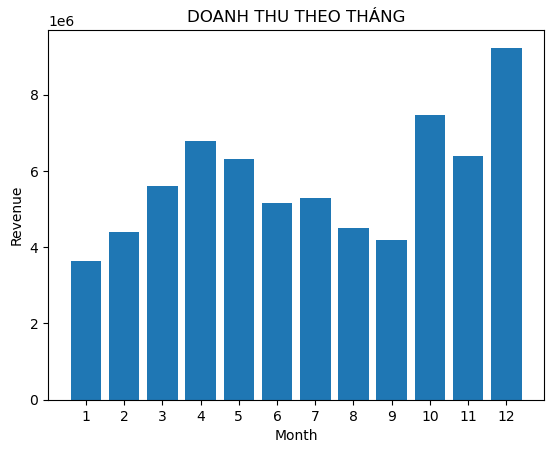

In [20]:
plt.bar(x = revenue_by_month['Month']
        , height= revenue_by_month['Revenue']
        )
plt.xticks(range(1,13,1))
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.title('DOANH THU THEO THÁNG')

plt.show()

**Kết Luận:**  
-> Tháng 12 có doanh thu cao nhất 13.775.472 USD

### Câu 2: Thành Phố có doanh thu cao nhất và số liệu 

In [21]:
revenue_by_city = df.groupby('City')['Revenue'].sum().reset_index()
revenue_by_city

,City,Revenue
0,Atlanta,5590997.16
1,Austin,3639163.50
2,Boston,7323284.02
3,Dallas,5535950.80
4,Los Angeles,10905141.60
5,New York City,9328634.86
6,Portland,4640981.22
7,San Francisco,16524407.82
8,Seattle,5495510.96


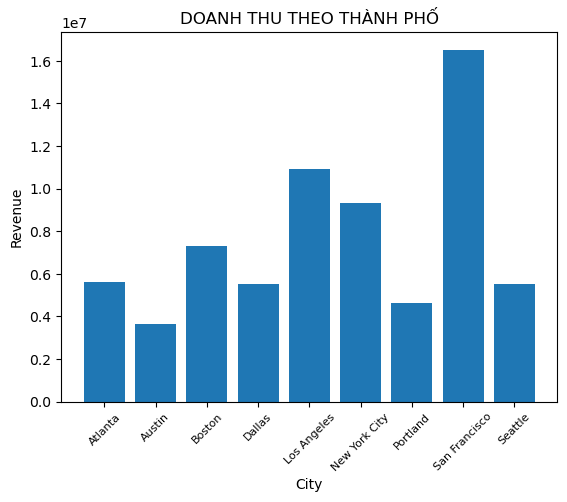

In [22]:
plt.bar(x = revenue_by_city['City']
        , height= revenue_by_city['Revenue']
        )

plt.xlabel('City')
plt.ylabel('Revenue')
plt.xticks(revenue_by_city['City'] , rotation=45, size =8)
plt.title('DOANH THU THEO THÀNH PHỐ')

plt.show()

**Kết Luận:**  
 Thành Phố San Francisco có doanh thu cao nhất 24.671.007 USD

### Câu 3: Doanh nghiệp cần quảng cáo vào khung thời gian nào để tăng khả năng mua hàng của khách

In [23]:
order_by_hour = df.groupby(['Purchase_hour', 'City'])['Order ID'].count().reset_index()

In [24]:
Seattle = order_by_hour.loc[order_by_hour['City'] == 'Seattle']
Austin = order_by_hour.loc[order_by_hour['City'] == 'Austin']
Boston = order_by_hour.loc[order_by_hour['City'] == 'Boston']
Dallas = order_by_hour.loc[order_by_hour['City'] == 'Dallas']
LA = order_by_hour.loc[order_by_hour['City'] == 'Los Angeles']
NY = order_by_hour.loc[order_by_hour['City'] == 'New York City']
Portland = order_by_hour.loc[order_by_hour['City'] == 'Portland']
SF = order_by_hour.loc[order_by_hour['City'] == 'San Francisco']
Seattle = order_by_hour.loc[order_by_hour['City'] == 'Seattle']

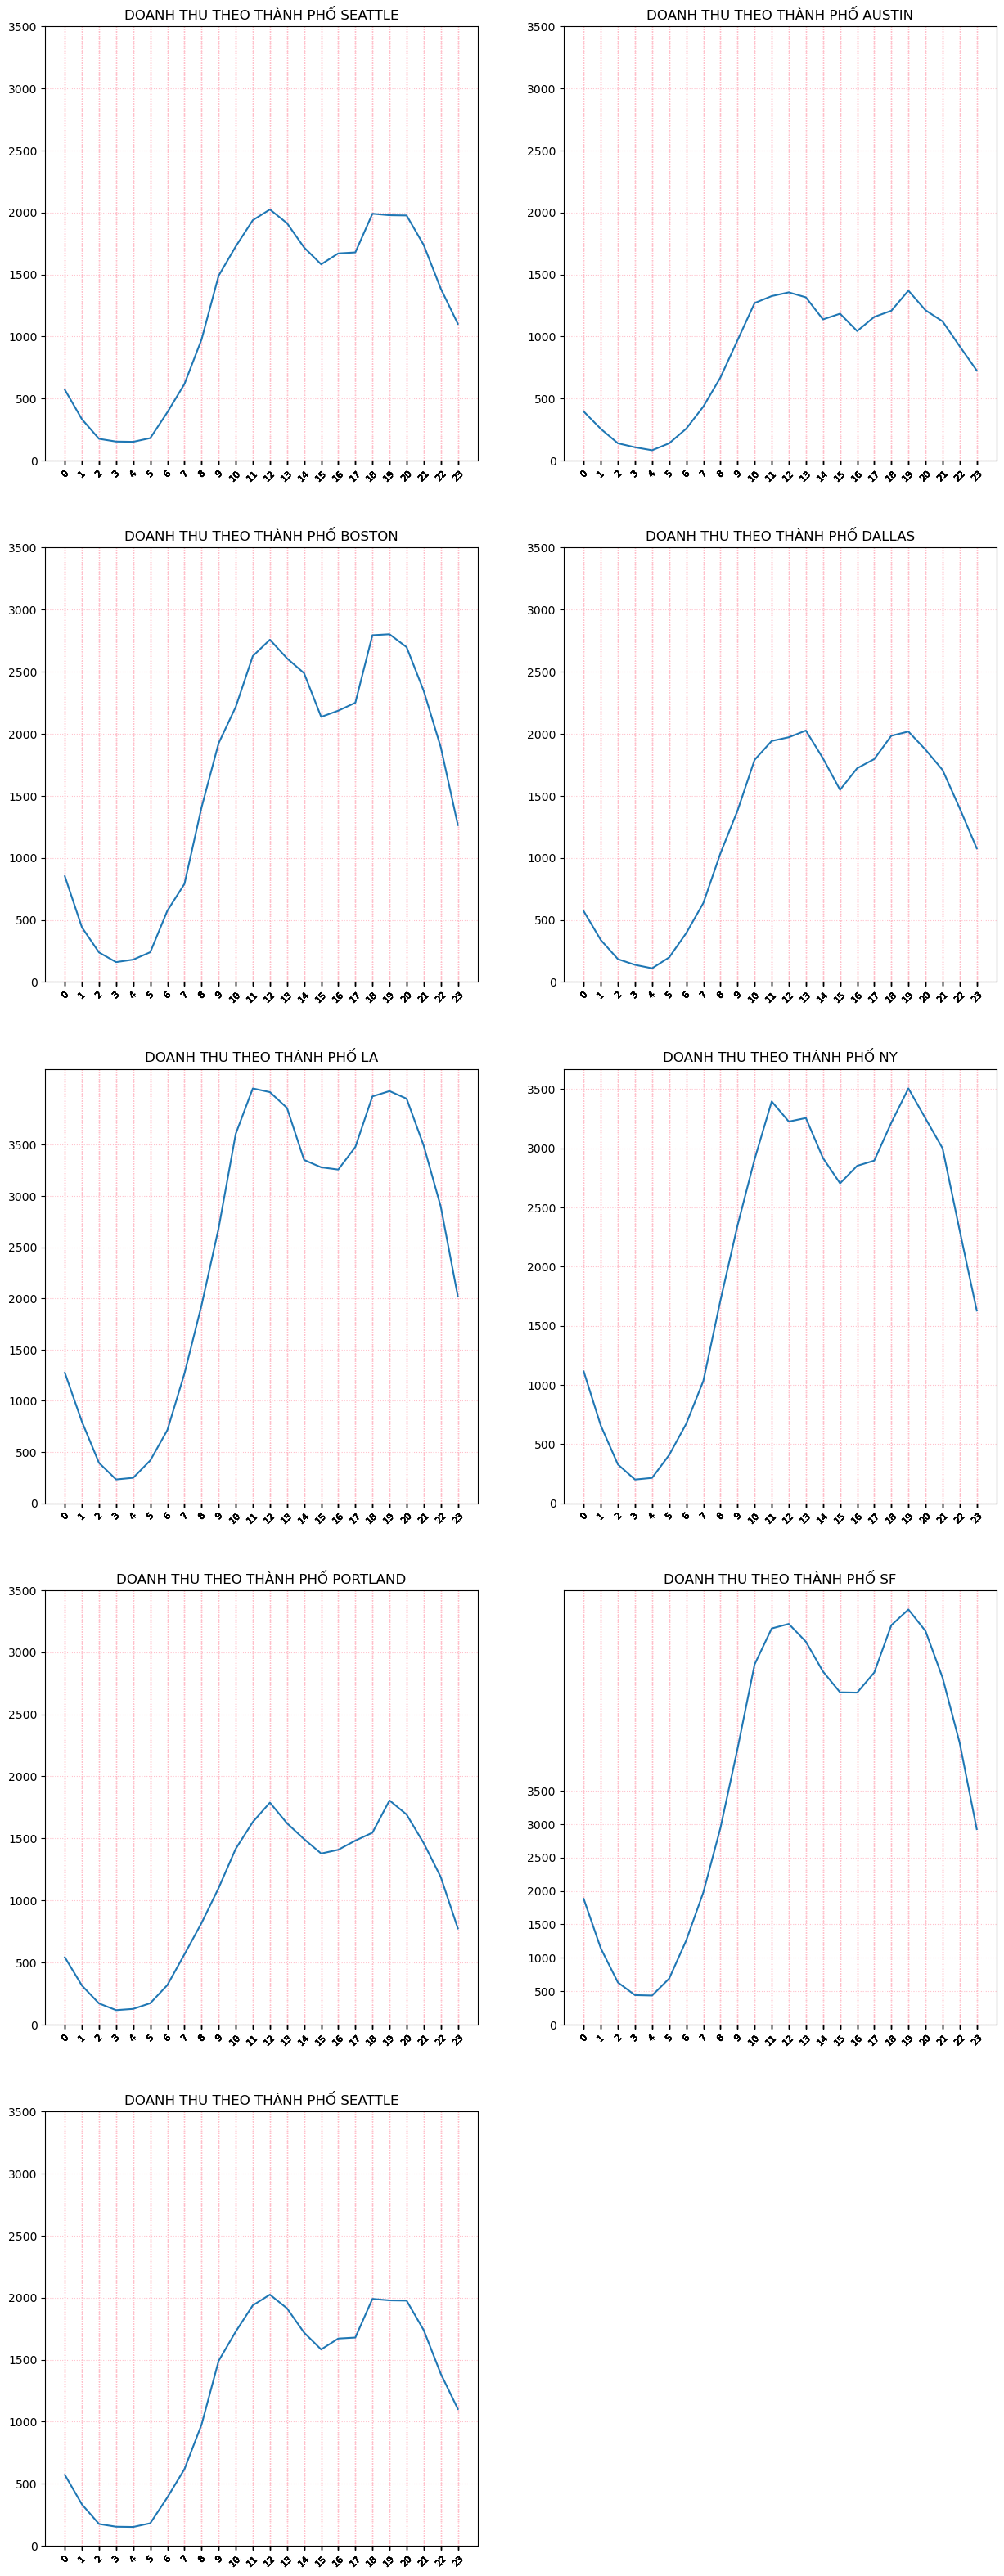

In [25]:
plt.figure(figsize=(15,40))
plt.subplot(5,2,1)
sns.lineplot(data = Seattle
		    , x = Seattle['Purchase_hour'] 
		    , y = Seattle['Order ID'])
plt.xticks(order_by_hour['Purchase_hour'] , rotation=45, size =8)
plt.xlabel('')
plt.ylabel('')
plt.yticks(range(0,4000,500))
plt.xticks(order_by_hour['Purchase_hour'] , rotation=45, size =8)
plt.title('DOANH THU THEO THÀNH PHỐ SEATTLE')
plt.grid(True , ls=':' , color = 'pink')

plt.subplot(5,2,2)
sns.lineplot(data = Austin
		    , x = Austin['Purchase_hour'] 
		    , y = Austin['Order ID'])
plt.xticks(order_by_hour['Purchase_hour'] , rotation=45, size =8)
plt.xlabel('')
plt.ylabel('')
plt.yticks(range(0,4000,500))
plt.xticks(order_by_hour['Purchase_hour'] , rotation=45, size =8)
plt.title('DOANH THU THEO THÀNH PHỐ AUSTIN')
plt.grid(True , ls=':' , color = 'pink')

plt.subplot(5,2,3)
sns.lineplot(data = Boston
		    , x = Boston['Purchase_hour'] 
		    , y = Boston['Order ID'])
plt.xticks(order_by_hour['Purchase_hour'] , rotation=45, size =8)
plt.xlabel('')
plt.ylabel('')
plt.yticks(range(0,4000,500))
plt.xticks(order_by_hour['Purchase_hour'] , rotation=45, size =8)
plt.title('DOANH THU THEO THÀNH PHỐ BOSTON')
plt.grid(True , ls=':' , color = 'pink')

plt.subplot(5,2,4)
sns.lineplot(data = Dallas
		    , x = Dallas['Purchase_hour'] 
		    , y = Dallas['Order ID'])
plt.xticks(order_by_hour['Purchase_hour'] , rotation=45, size =8)
plt.xlabel('')
plt.ylabel('')
plt.yticks(range(0,4000,500))
plt.xticks(order_by_hour['Purchase_hour'] , rotation=45, size =8)
plt.title('DOANH THU THEO THÀNH PHỐ DALLAS')
plt.grid(True , ls=':' , color = 'pink')

plt.subplot(5,2,5)
sns.lineplot(data = LA
		    , x = LA['Purchase_hour'] 
		    , y = LA['Order ID'])
plt.xticks(order_by_hour['Purchase_hour'] , rotation=45, size =8)
plt.xlabel('')
plt.ylabel('')
plt.yticks(range(0,4000,500))
plt.xticks(order_by_hour['Purchase_hour'] , rotation=45, size =8)
plt.title('DOANH THU THEO THÀNH PHỐ LA')
plt.grid(True , ls=':' , color = 'pink')

plt.subplot(5,2,6)
sns.lineplot(data = NY
		    , x = NY['Purchase_hour'] 
		    , y = NY['Order ID'])
plt.xticks(order_by_hour['Purchase_hour'] , rotation=45, size =8)
plt.xlabel('')
plt.ylabel('')
plt.yticks(range(0,4000,500))
plt.xticks(order_by_hour['Purchase_hour'] , rotation=45, size =8)
plt.title('DOANH THU THEO THÀNH PHỐ NY')
plt.grid(True , ls=':' , color = 'pink')

plt.subplot(5,2,7)
sns.lineplot(data = Portland
		    , x = Portland['Purchase_hour'] 
		    , y = Portland['Order ID'])
plt.xticks(order_by_hour['Purchase_hour'] , rotation=45, size =8)
plt.xlabel('')
plt.ylabel('')
plt.yticks(range(0,4000,500))
plt.xticks(order_by_hour['Purchase_hour'] , rotation=45, size =8)
plt.title('DOANH THU THEO THÀNH PHỐ PORTLAND')
plt.grid(True , ls=':' , color = 'pink')

plt.subplot(5,2,8)
sns.lineplot(data = SF
		    , x = SF['Purchase_hour'] 
		    , y = SF['Order ID'])
plt.xticks(order_by_hour['Purchase_hour'] , rotation=45, size =8)
plt.xlabel('')
plt.ylabel('')
plt.yticks(range(0,4000,500))
plt.xticks(order_by_hour['Purchase_hour'] , rotation=45, size =8)
plt.title('DOANH THU THEO THÀNH PHỐ SF')
plt.grid(True , ls=':' , color = 'pink')

plt.subplot(5,2,9)
sns.lineplot(data = Seattle
		    , x = Seattle['Purchase_hour'] 
		    , y = Seattle['Order ID'])
plt.xticks(order_by_hour['Purchase_hour'] , rotation=45, size =8)
plt.xlabel('')
plt.ylabel('')
plt.yticks(range(0,4000,500))
plt.xticks(order_by_hour['Purchase_hour'] , rotation=45, size =8)
plt.title('DOANH THU THEO THÀNH PHỐ SEATTLE')
plt.grid(True , ls=':' , color = 'pink')

plt.show()

**Kết Luận:**   
Tất cả thành phố đều có số lượng mua hàng đạt đỉnh tại hai khoản thời gian 12:00 và 19:00 và sức mua giảm dần sau đó 2-3 tiếng.

Đây là thời điểm khách hàng online nhiều nhất, do là giờ nghĩ trưa và giờ tan làm

-> Ta sẽ đẩy mạnh quảng cáo vào 2 khung giờ 11:00 - 15:00 và 18:00 - 22:00 (Trước thời gian mua hàng đạt đỉnh 1 tiếng)

### Câu 4: Sản phẩm nào thường được bán cùng nhau:

In [26]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Revenue,City,Purchase_hour
0,162009,iPhone,1,700.00,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",3,700.00,Austin,20
1,162009,Lightning Charging Cable,1,14.95,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",3,14.95,Austin,20
2,162009,Wired Headphones,2,11.99,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",3,23.98,Austin,20
3,162010,Bose SoundSport Headphones,1,99.99,2019-03-17 05:39:00,"261 10th St, San Francisco, CA 94016",3,99.99,San Francisco,5
4,162011,34in Ultrawide Monitor,1,379.99,2019-03-10 00:01:00,"764 13th St, San Francisco, CA 94016",3,379.99,San Francisco,0


In [27]:
data4 = df.loc[:,['Order ID' , 'Product']]

Lấy những đơn hàng có 2 đơn hàng trở lên

In [28]:
order_id_over_2 = data4.loc[data4['Order ID'].duplicated(keep=False)]

Gộp tất cả sản phẩm có cùng Order ID 

In [29]:
combile_product = order_id_over_2.groupby('Order ID')['Product'].apply(', '.join).reset_index()

Đếm số lượng đơn hàng có cùng các cặp sản phẩm

In [30]:
num_combile_product = combile_product.groupby('Product')['Order ID'].count().reset_index()

Đổi tên cột Order ID thành total_order

In [31]:
num_combile_product.rename(columns={'Order ID' : 'total_order'}, inplace=True)

Top 10 sản phẩm mua cùng nhau

In [32]:
num_combile_product.sort_values(['total_order'], ascending=False).head(10)

,Product,total_order
239,"Lightning Charging Cable, Lightning Charging C...",19831
97,"AAA Batteries (4-pack), AAA Batteries (4-pack)",19826
77,"AA Batteries (4-pack), AA Batteries (4-pack)",19809
297,"USB-C Charging Cable, USB-C Charging Cable",19792
343,"Wired Headphones, Wired Headphones",17208
117,"Apple Airpods Headphones, Apple Airpods Headph...",14575
137,"Bose SoundSport Headphones, Bose SoundSport He...",12505
38,"27in FHD Monitor, 27in FHD Monitor",7213
18,"27in 4K Gaming Monitor, 27in 4K Gaming Monitor",5979
58,"34in Ultrawide Monitor, 34in Ultrawide Monitor",5935


**Kết Luận:**  
Đây là những sản phẩm thường được mua cùng nhau ta có thể thực hiện những phương án:
- Gộp những sản phẩm này thành một combo tạo chương trình khuyến để kích cầu mua sắm 
- Tạo chương trình khuyến mãi gộp những combo này với những sản phẩm tồn kho nhiều để giải phóng tồn kho

### Câu 5: Thực hiện bài toán bán chéo (Association Rule)

In [33]:
association_rule = pd.merge( 
left= order_id_over_2
, right= order_id_over_2
, right_on= order_id_over_2['Order ID']
, left_on= order_id_over_2['Order ID']
, how= 'left'
)

Đổi tên cột Product_x -> Product_A và Product_y -> Product_B

In [34]:
association_rule.rename(columns={'Product_x': 'Product_A' , 'Product_y': 'Product_B' , 'Order ID_x' : 'Order ID'} , inplace=True)

Loại bỏ những cột không cần thiết

In [35]:
association_rule.drop(columns=['key_0' , 'Order ID_y'] , inplace=True)

 Loại bỏ những hàng mà giá trị 'Product A' = giá trị cột 'Product B'

In [36]:
association_rule.drop(association_rule.loc[association_rule['Product_A'] == association_rule['Product_B']].index , inplace=True)

Tính toán chỉ số 
- support
- concedent
- lift

In [37]:
association_rule = association_rule.groupby(['Product_A' , 'Product_B'])['Order ID'].count().reset_index().rename(columns={'Order ID' : 'Order_num'})

In [38]:
num_purchase_product = data4.value_counts('Product').reset_index(name='num_purchase')

Thêm cột num_purchase_product_A 

In [39]:
association_rule = pd.merge( 
left= association_rule
, right= num_purchase_product
, right_on= num_purchase_product['Product']
, left_on= association_rule['Product_A']
, how= 'left'
).drop(columns=['key_0' , 'Product']).rename(columns={'num_purchase' : 'num_purchase_product_A'})

Thêm cột num_purchase_product_B

In [40]:
association_rule = pd.merge( 
left= association_rule
, right= num_purchase_product
, right_on= num_purchase_product['Product']
, left_on= association_rule['Product_B']
, how= 'left'
).drop(columns=['key_0' , 'Product']).rename(columns={'num_purchase' : 'num_purchase_product_B'})

Chỉ số tổng đơn hàng

In [41]:
total_order = data4['Order ID'].nunique()

Chỉ số Support

In [42]:
association_rule['Support'] = (association_rule['Order_num'] / total_order)*100

Chỉ số Confidence

In [43]:
association_rule['Confidence'] = association_rule['Order_num'] / association_rule['num_purchase_product_A']*100 

Chỉ số Lift

In [44]:
association_rule['Lift'] = (association_rule['Order_num']/ association_rule['num_purchase_product_A']) / (association_rule['num_purchase_product_B']/total_order)

In [45]:
association_rule.loc[ : , ['Product_A' , 'Product_B' ,'Support', 'Confidence' , 'Lift']].sort_values(['Support', 'Confidence' , 'Lift'] , ascending=False ).head(10)

,Product_A,Product_B,Support,Confidence,Lift
312,iPhone,Lightning Charging Cable,2.275313,29.669687,1.222220
217,Lightning Charging Cable,iPhone,2.275313,9.372980,1.222220
171,Google Phone,USB-C Charging Cable,2.239446,36.162896,1.473040
260,USB-C Charging Cable,Google Phone,2.239446,9.122038,1.473040
317,iPhone,Wired Headphones,1.035660,13.504823,0.638110
300,Wired Headphones,iPhone,1.035660,4.893549,0.638110
173,Google Phone,Wired Headphones,0.948234,15.312217,0.723511
292,Wired Headphones,Google Phone,0.948234,4.480458,0.723511
307,iPhone,Apple Airpods Headphones,0.836149,10.903245,0.625617
122,Apple Airpods Headphones,iPhone,0.836149,4.797736,0.625617


**Chú thích:**  
- Support: Thể hiện mức độ phổ biến của cặp sản phẩm trong tất cả đơn hàng  
- Confidence: Xác suất khả năng mua sản phẩm B nếu khách hàng đã mua sản phẩm A  
- lift thể hện mức độ tương quan giữa cặp sản phẩm
    - Lift > 1: Nếu mua sản phẩm A sẽ tăng khả năng mua sản phẩm B
    - Lift < 1: Nếu mua sản phẩm A sẽ giảm khả năng mua sản phẩm B
    - Lift = 1: 2 sản phẩm A và B không liên quan gì tới khả năng mua hàng của nhau

**Kết luận:**  
Chỉ số support của các cặp sản phẩm không cao, đa số khách hàng vào của hàng chỉ mua sản phẩm lẻ
Có 2 cặp sản phẩm có thể tạo chuơng trình khuyến mãi là  
**iPhone - Lightning Charging Cable** và **Google Phone - USB-C Charging Cable**
- Có 0.5% người vào của hàng mua 'iPhone' và có đến 14,8% người mua iphone sẽ mua 'Lightning Charging Cable'
- Có 0.5% người vào cửa hàng mua 'Google Phone'và có đến 18% người mua 'Google Phone' sẽ mua 'USB-C Charging Cable'